In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# import data from the github page of the book
data = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter02/data/Absenteeism_at_work.csv', sep=";")

In [0]:
# print dimensionality of the data, columns, types and missing values
print(f"Data dimension: {data.shape}")
for col in data.columns:
    print(f"Column: {col:35} | type: {str(data[col].dtype):7} | missing values: {data[col].isna().sum():3d}")

Data dimension: (740, 21)
Column: ID                                  | type: int64   | missing values:   0
Column: Reason for absence                  | type: int64   | missing values:   0
Column: Month of absence                    | type: int64   | missing values:   0
Column: Day of the week                     | type: int64   | missing values:   0
Column: Seasons                             | type: int64   | missing values:   0
Column: Transportation expense              | type: int64   | missing values:   0
Column: Distance from Residence to Work     | type: int64   | missing values:   0
Column: Service time                        | type: int64   | missing values:   0
Column: Age                                 | type: int64   | missing values:   0
Column: Work load Average/day               | type: float64 | missing values:   0
Column: Hit target                          | type: int64   | missing values:   0
Column: Disciplinary failure                | type: int64   | missing va

In [0]:
# compute statistics on numerical features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


In [0]:
# define encoding dictionaries
month_encoding = {1: "January", 2: "February", 3: "March", 4: "April", 
    5: "May", 6: "June", 7: "July", 8: "August", 
    9: "September", 10: "October", 11: "November", 12: "December", 0: "Unknown"}
dow_encoding = {2: "Monday", 3: "Tuesday", 4: "Wednesday", 5: "Thursday", 6: "Friday"}
season_encoding = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
education_encoding = {1: "high_school", 2: "graduate", 3: "postgraduate", 4: "master_phd"}
yes_no_encoding = {0: "No", 1: "Yes"}

# backtransform numerical variables to categorical
preprocessed_data = data.copy()
preprocessed_data["Month of absence"] = preprocessed_data["Month of absence"]\
    .apply(lambda x: month_encoding[x]) 
preprocessed_data["Day of the week"] = preprocessed_data["Day of the week"]\
    .apply(lambda x: dow_encoding[x]) 
preprocessed_data["Seasons"] = preprocessed_data["Seasons"]\
    .apply(lambda x: season_encoding[x]) 
preprocessed_data["Education"] = preprocessed_data["Education"]\
    .apply(lambda x: education_encoding[x]) 
preprocessed_data["Disciplinary failure"] = preprocessed_data["Disciplinary failure"]\
    .apply(lambda x: yes_no_encoding[x]) 
preprocessed_data["Social drinker"] = preprocessed_data["Social drinker"]\
    .apply(lambda x: yes_no_encoding[x]) 
preprocessed_data["Social smoker"] = preprocessed_data["Social smoker"]\
    .apply(lambda x: yes_no_encoding[x]) 

In [0]:
# transform columns
preprocessed_data.head().T

,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


**Exercise 2.01: Identifying Disease Reasons for Absence**

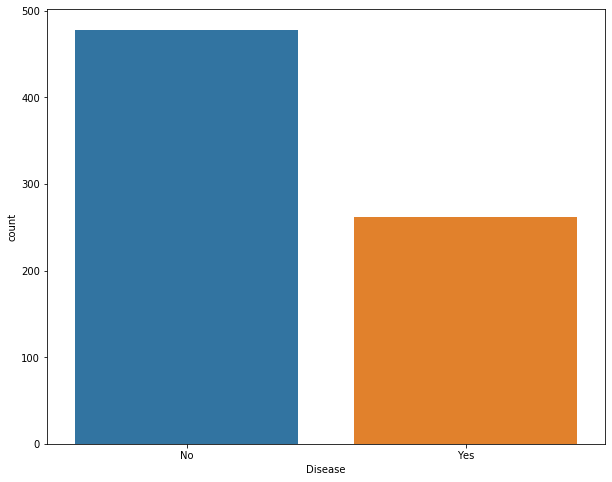

In [0]:
# define function, which checks if the provided integer value 
# is contained in the ICD or not
def in_icd(val):
    return "Yes" if val >= 1 and val <= 21 else "No"

# add Disease column
preprocessed_data["Disease"] = preprocessed_data["Reason for absence"]\
    .apply(in_icd)

# plot value counts
plt.figure(figsize=(10, 8))
sns.countplot(data=preprocessed_data, x='Disease')
plt.savefig('figs/disease_plot.png', format='png', dpi=300)